Lambda School Data Science

*Unit 4, Sprint 3, Module 3*

---

# Autoencoders

> An autoencoder is a type of artificial neural network used to learn efficient data codings in an unsupervised manner.[1][2] The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore signal “noise”. Along with the reduction side, a reconstructing side is learnt, where the autoencoder tries to generate from the reduced encoding a representation as close as possible to its original input, hence its name. 

## Learning Objectives
*At the end of the lecture you should be to*:
* <a href="#p1">Part 1</a>: Describe the componenets of an autoencoder
* <a href="#p2">Part 2</a>: Train an autoencoder
* <a href="#p3">Part 3</a>: Apply an autoenocder to a basic information retrieval problem

__Problem:__ Is it possible to automatically represent an image as a fixed-sized vector even if it isn’t labeled?

__Solution:__ Use an autoencoder

Why do we need to represent an image as a fixed-sized vector do you ask? 

* __Information Retrieval__
    - [Reverse Image Search](https://en.wikipedia.org/wiki/Reverse_image_search)
    - [Recommendation Systems - Content Based Filtering](https://en.wikipedia.org/wiki/Recommender_system#Content-based_filtering)
* __Dimensionality Reduction__
    - [Feature Extraction](https://www.kaggle.com/c/vsb-power-line-fault-detection/discussion/78285)
    - [Manifold Learning](https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction)

We've already seen *representation learning* when we talked about word embedding modelings during our NLP week. Today we're going to achieve a similiar goal on images using *autoencoders*. An autoencoder is a neural network that is trained to attempt to copy its input to its output. Usually they are restricted in ways that allow them to copy only approximately. The model often learns useful properties of the data, because it is forced to prioritize which aspecs of the input should be copied. The properties of autoencoders have made them an important part of modern generative modeling approaches. Consider autoencoders a special case of feed-forward networks (the kind we've been studying); backpropagation and gradient descent still work. 

# Autoencoder Architecture (Learn)
<a id="p1"></a>

## Overview

The *encoder* compresses the input data and the *decoder* does the reverse to produce the uncompressed version of the data to create a reconstruction of the input as accurately as possible:

<img src='https://miro.medium.com/max/1400/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png' width=800/>

The learning process gis described simply as minimizing a loss function: 
$ L(x, g(f(x))) $

- $L$ is a loss function penalizing $g(f(x))$ for being dissimiliar from $x$ (such as mean squared error)
- $f$ is the encoder function
- $g$ is the decoder function

## Follow Along
### Extremely Simple Autoencoder

In [12]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
# import wandb
# from wandb.keras import WandbCallback

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='sigmoid')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation = 'sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [13]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [14]:
# create a placeholder for an encoded (32-dimensional) input


# retrieve the last layer of the autoencoder model


# create the decoder model


In [15]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [16]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [17]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [19]:
#wandb.init(project="mnist_autoencoder", entity="ds5")

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose = True)

# can stop running/training of model at any point and training will be preserved

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.6945 - val_loss: 0.6943
Epoch 2/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.6940 - val_loss: 0.6938
Epoch 3/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.6935 - val_loss: 0.6934
Epoch 4/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.6931 - val_loss: 0.6929
Epoch 5/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.6927 - val_loss: 0.6925
Epoch 6/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.6922 - val_loss: 0.6920
Epoch 7/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.6918 - val_loss: 0.6916
Epoch 8/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.6913 - val_loss: 0.6911
Epoch 9/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.6909 - val

In [23]:
# encode and decode some digits
# note that we take them from the *test* set

# visualize the results

#encoded_images = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

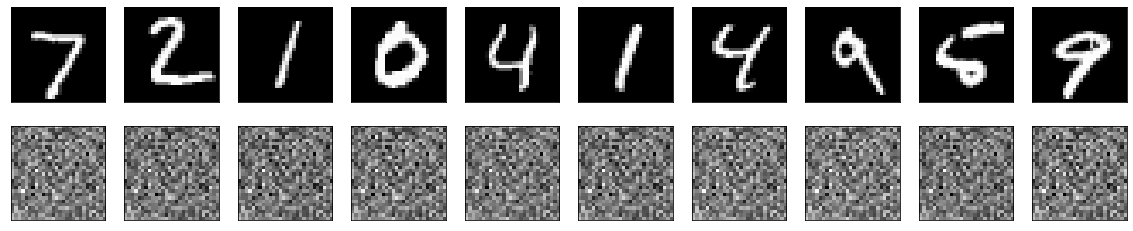

In [24]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# poor results; highly dependent on training time

## Challenge

Expected to talk about the components of autoencoder and their purpose. 

# Train an Autoencoder (Learn)
<a id="p2"></a>

## Overview

As long as our architecture maintains an hourglass shape, we can continue to add layers and create a deeper network. 

## Follow Along

### Deep Autoencoder

In [27]:
input_img = Input(shape=(784,)) # first layer of the neural network
encoded = Dense(128, activation= 'relu')(input_img) # input_img - the data getting pushed to the next layer
encoded = Dense(64, activation= 'relu')(encoded)
encoded = Dense(32, activation= 'relu')(encoded) # fully dehydrated layer

decoded = Dense(64, activation= 'relu')(encoded)
decoded = Dense(128, activation= 'relu')(decoded)
decoded = Dense(784, activation= 'sigmoid')(decoded)


In [34]:
# compile & fit model

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=784,
                shuffle=True,
                validation_data=(x_test,x_test),
                verbose= True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1046 - val_loss: 0.0974
Epoch 2/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0983 - val_loss: 0.0971
Epoch 3/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0980 - val_loss: 0.0969
Epoch 4/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0977 - val_loss: 0.0965
Epoch 5/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0974 - val_loss: 0.0965
Epoch 6/20
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0971 - val_loss: 0.0959
Epoch 7/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0968 - val_loss: 0.0957
Epoch 8/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0965 - val_loss: 0.0953
Epoch 9/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0962 - val_

In [35]:
decoded_imgs = autoencoder.predict(x_test)

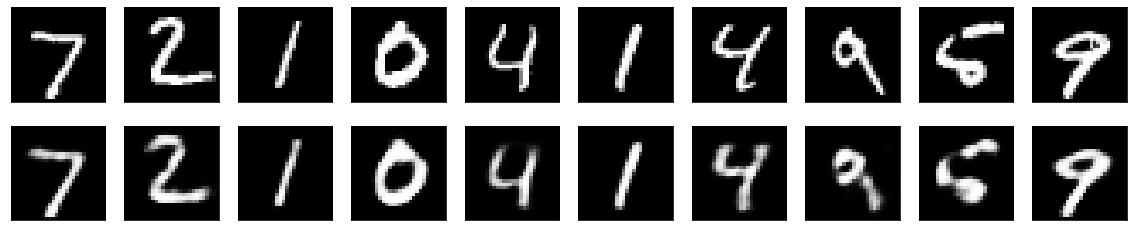

In [36]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Convolutional autoencoder

> Since our inputs are images, it makes sense to use convolutional neural networks (convnets) as encoders and decoders. In practical settings, autoencoders applied to images are always convolutional autoencoders --they simply perform much better.

> Let's implement one. The encoder will consist in a stack of Conv2D and MaxPooling2D layers (max pooling being used for spatial down-sampling), while the decoder will consist in a stack of Conv2D and UpSampling2D layers.

In [46]:
# Working with upsampling example

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

# Create Model 
# Create Model 
input_img = Input(shape=(28,28,1))

x = Conv2D(16,(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional representation

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [47]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 8)           0   

In [48]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [52]:
#wandb.init(project="mnist_autoencoder", entity="ds5")

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=784,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2405 - val_loss: 0.2059
Epoch 2/20
60000/60000 [==============================] - 59s 984us/step - loss: 0.1931 - val_loss: 0.1794
Epoch 3/20
47040/60000 [======================>.......] - ETA: 12s - loss: 0.1736

KeyboardInterrupt: 

In [56]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

ValueError: num must be 1 <= num <= 20, not 0

<Figure size 1440x288 with 0 Axes>

#### Visualization of the Representations

In [57]:
encoder = Model(input_img, encoded)
encoder.predict(x_train)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

ValueError: num must be 1 <= num <= 10, not 0

<Figure size 1440x576 with 0 Axes>

## Challenge

You will train an autoencoder at some point in the near future. 

# Information Retrieval with Autoencoders (Learn)
<a id="p3"></a>

## Overview

A common usecase for autoencoders is for reverse image search. Let's try to draw an image and see what's most similiar in our dataset. 

To accomplish this we will need to slice our autoendoer in half to extract our reduced features. :) 

## Follow Along

In [53]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_train)

In [54]:
encoded_imgs[0].reshape((128,))  #shape before reshape: 4,4,8

array([0.9553785 , 1.0030951 , 1.2517272 , 1.2619445 , 0.59799653,
       0.39861986, 0.61256075, 0.6165187 , 1.5726607 , 0.9506526 ,
       1.9281753 , 2.5866013 , 1.3428502 , 1.4858543 , 0.17231794,
       3.2069705 , 1.2345886 , 0.15882264, 2.0090477 , 2.6984994 ,
       1.8260287 , 1.6452832 , 0.1539248 , 3.2049851 , 0.107747  ,
       0.        , 0.78981924, 1.4821328 , 1.7297632 , 1.086806  ,
       0.        , 1.1698254 , 1.6881803 , 0.28154495, 2.5499256 ,
       0.8076357 , 0.12502332, 0.7724748 , 1.4407306 , 0.82739013,
       3.3688679 , 0.6005444 , 2.411219  , 2.3208175 , 1.7392981 ,
       3.0240479 , 0.9096586 , 2.8511224 , 2.738798  , 0.        ,
       1.0739504 , 2.2574978 , 3.4089317 , 2.8461678 , 0.        ,
       2.5961006 , 0.54486674, 0.18647054, 0.29616696, 0.8786919 ,
       2.2163005 , 1.4049305 , 0.        , 0.4926298 , 1.467574  ,
       0.91779643, 1.6880077 , 1.3669889 , 0.7428817 , 0.7510942 ,
       0.61997813, 1.7622789 , 2.7935417 , 0.08159879, 2.69825

In [99]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
nn.fit(encoded_imgs)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [ ]:
nn.kneighbors(...)

## Challenge

You should already be familiar with KNN and similarity queries, so the key component of this section is know what to 'slice' from your autoencoder (the encoder) to extract features from your data. 

# Review

* <a href="#p1">Part 1</a>: Describe the componenets of an autoencoder
    - Enocder
    - Decoder
* <a href="#p2">Part 2</a>: Train an autoencoder
    - Can do in Keras Easily
    - Can use a variety of architectures
    - Architectures must follow hourglass shape
* <a href="#p3">Part 3</a>: Apply an autoenocder to a basic information retrieval problem
    - Extract just the encoder to use for various tasks
    - AE ares good for dimensionality reduction, reverse image search, and may more things. 


# Sources

__References__
- [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)
- [Deep Learning Cookbook](http://shop.oreilly.com/product/0636920097471.do)

__Additional Material__